In [2]:
def crop_center(in_img, infilename):
    in_width, in_height = in_img.size
    crop_width, crop_height = in_width//3, in_height//3 #中心付近1/3の範囲をトリミング
    crop_img = in_img.crop(((in_width - crop_width)//2,
                            (in_height - crop_height)//2,
                            (in_width + crop_width)//2,
                            (in_height + crop_height)//2))
    return crop_img

In [3]:
import glob
from PIL import Image

In [4]:
infilenames = glob.glob('./raw/*')

In [8]:
infilename = infilenames[0]
in_img = Image.open(infilename)
crop_img = crop_center(in_img, infilename)
rgbed_img = crop_img.convert("RGB")
rgb = np.array(rgbed_img.getdata())

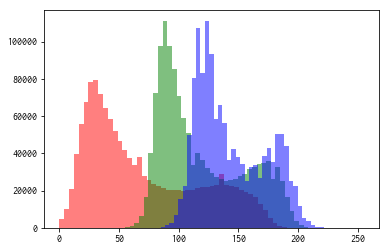

In [27]:
plt.hist(rgb[:, 0], alpha=0.5, color='r', bins=50)
plt.hist(rgb[:, 1], alpha=0.5, color='g', bins=50)
plt.hist(rgb[:, 2], alpha=0.5, color='b', bins=50)
plt.show()

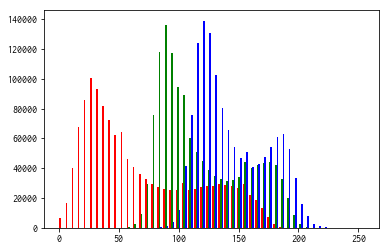

In [28]:
plt.hist([rgb[:, 0], rgb[:, 1], rgb[:, 2]], color=['r', 'g', 'b'], bins=50)
plt.show()

In [5]:
len(infilenames)

28

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


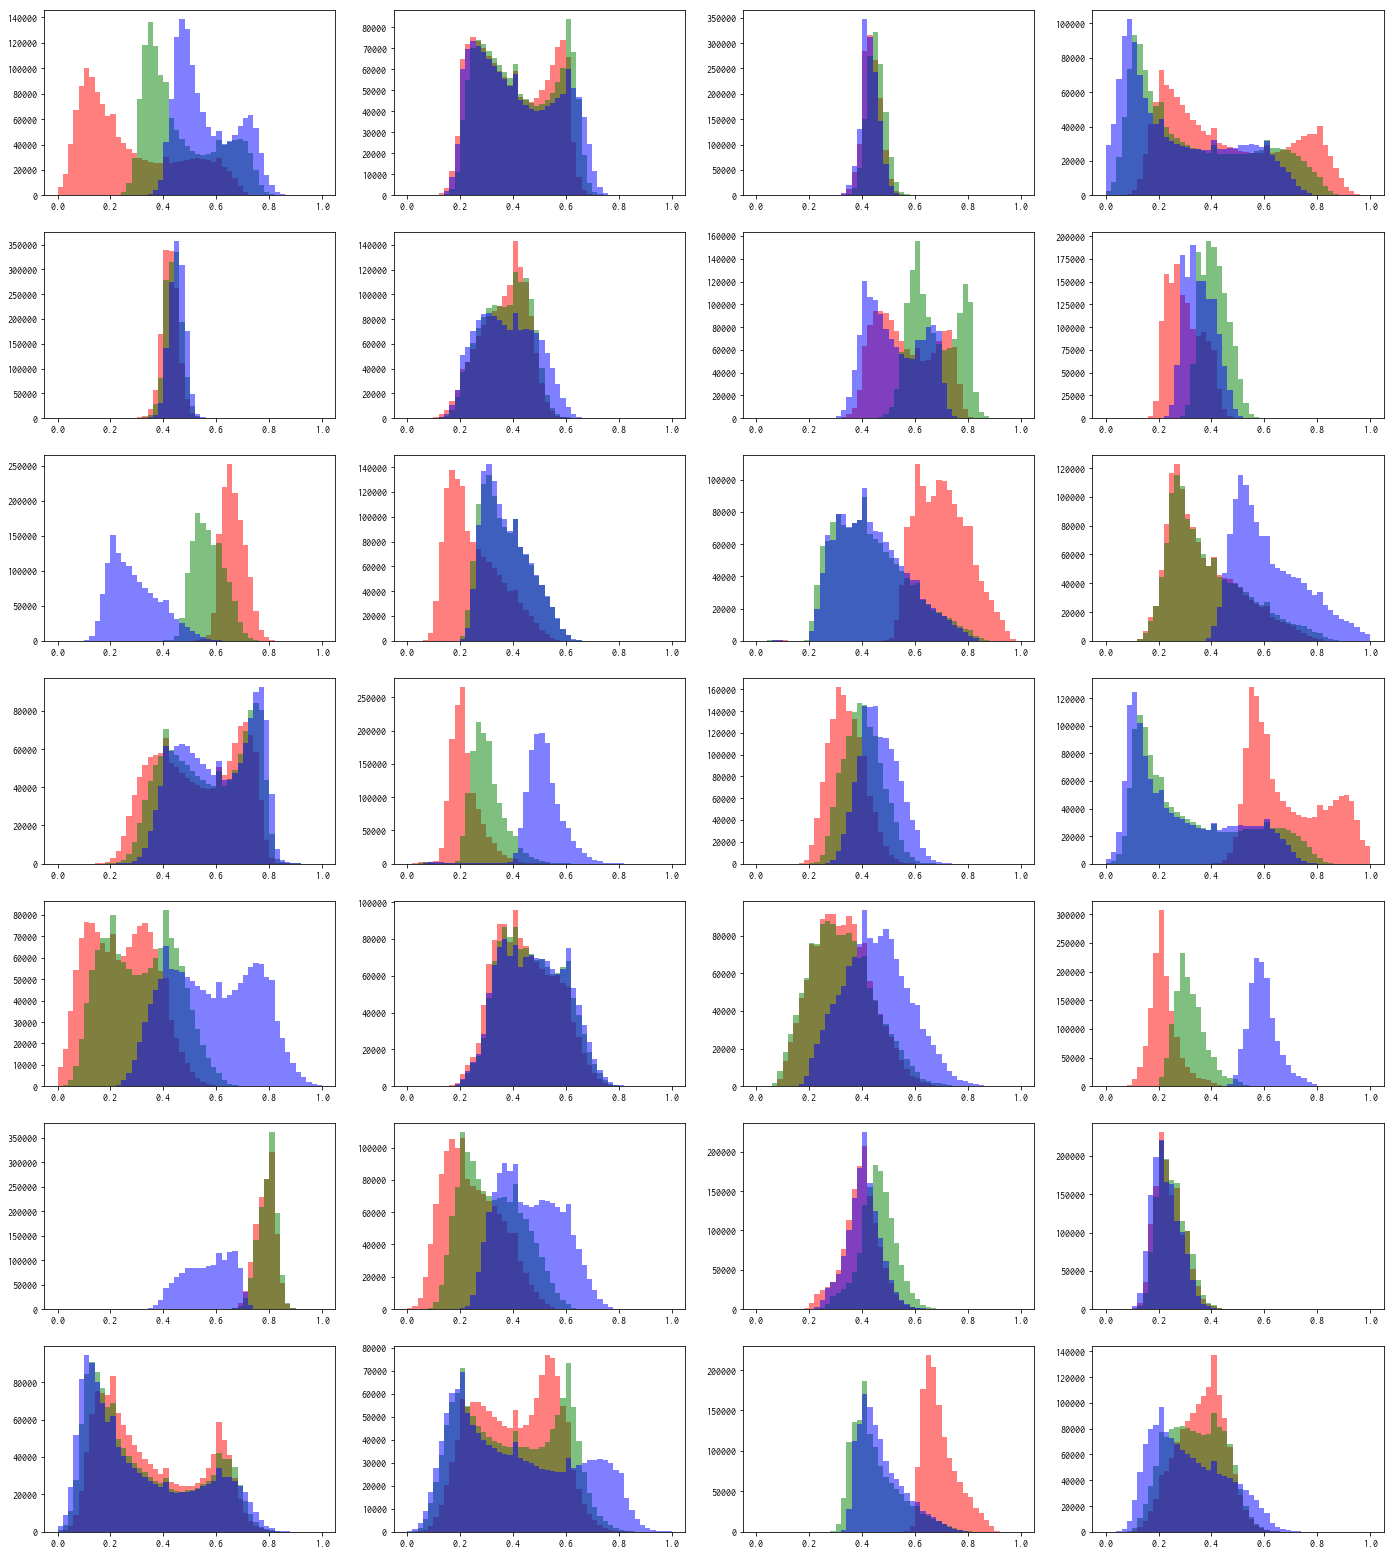

In [10]:
nrows = len(infilenames)//4
ncols = 4
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows))

for i, infilename in enumerate(infilenames):
    in_img = Image.open(infilename)
    crop_img = crop_center(in_img, infilename)
    rgbed_img = crop_img.convert("RGB")
    rgb = np.array(rgbed_img.getdata())
    rgb = rgb/255
    ax[i//4, i%4].hist(rgb[:, 0], alpha=0.5, color='r', bins=50, range=(0, 1))
    ax[i//4, i%4].hist(rgb[:, 1], alpha=0.5, color='g', bins=50, range=(0, 1))
    ax[i//4, i%4].hist(rgb[:, 2], alpha=0.5, color='b', bins=50, range=(0, 1))
fig.savefig('rgb_hist', dpi=200)
fig.show()

In [8]:
import colorsys

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


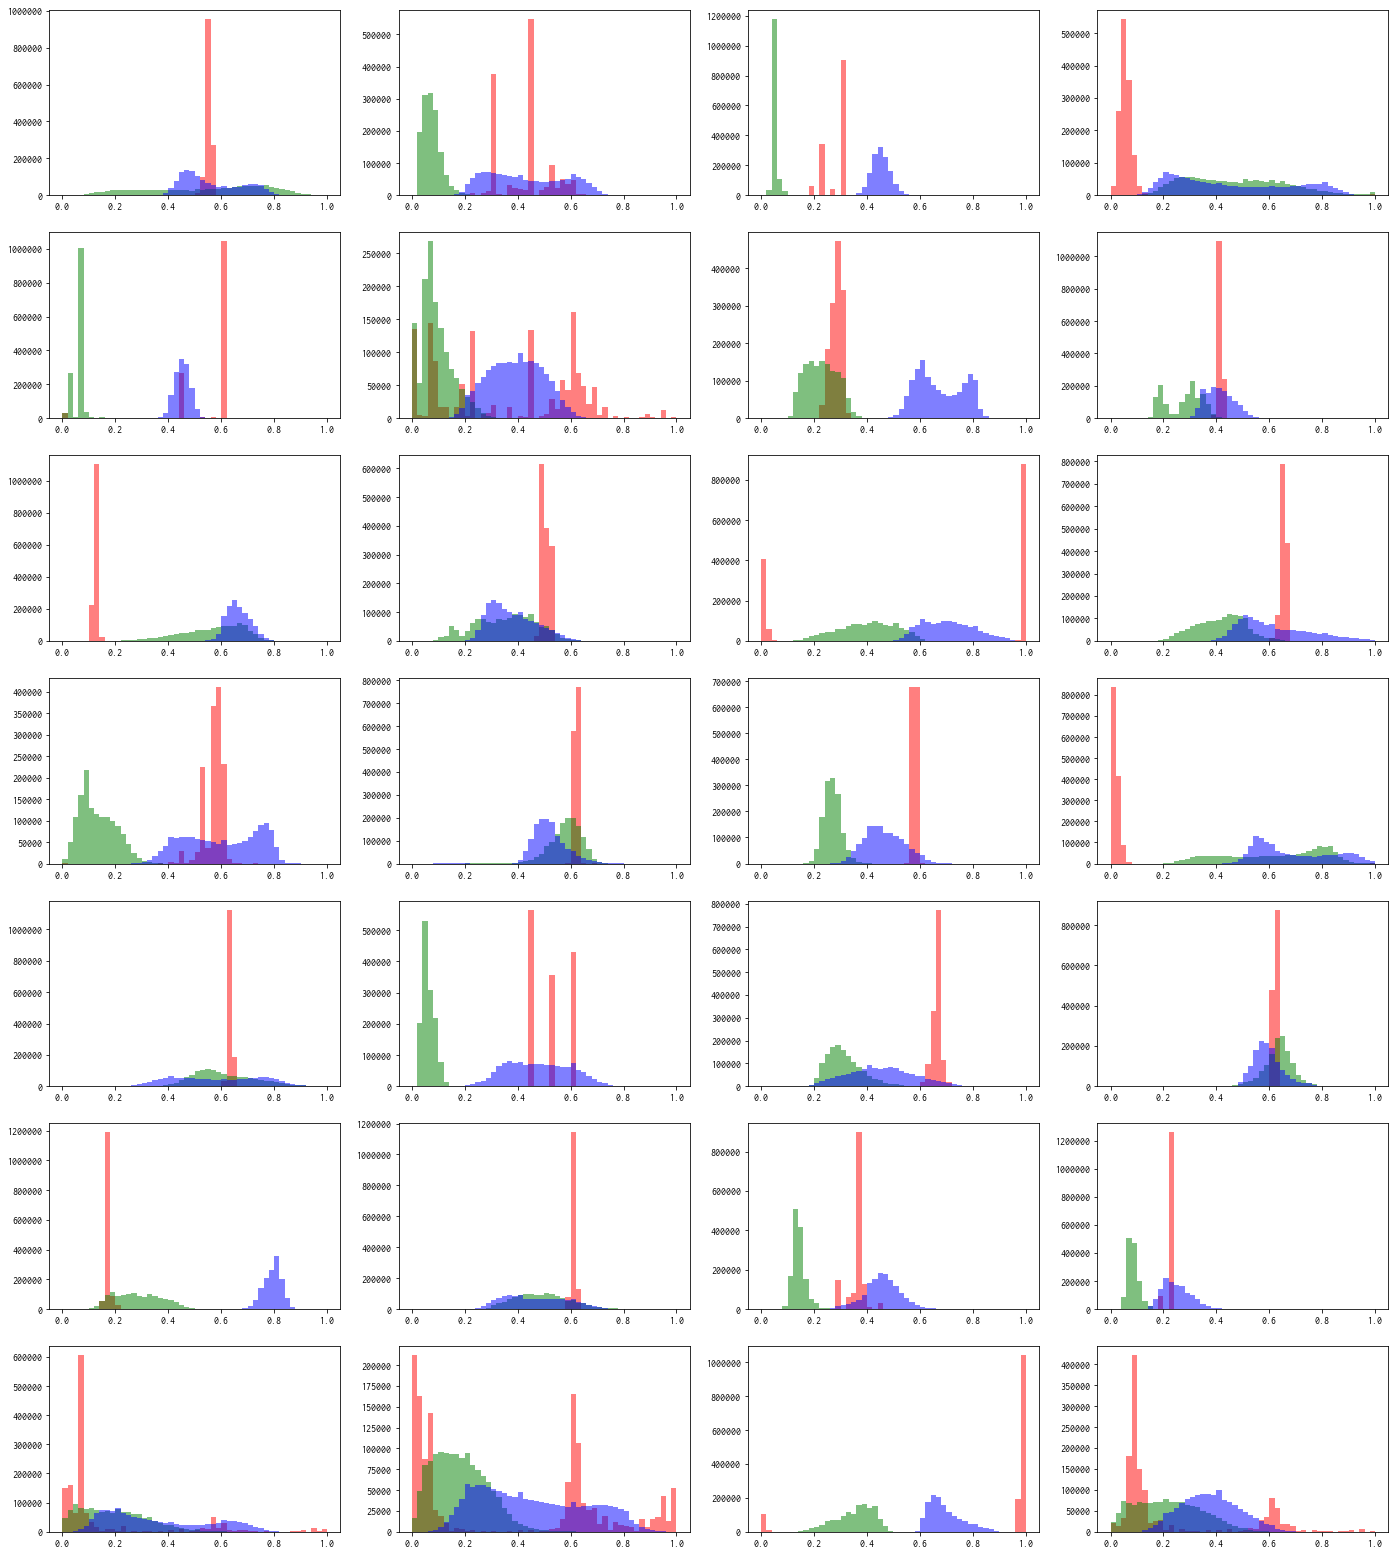

In [11]:
nrows = len(infilenames)//4
ncols = 4
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows))

for i, infilename in enumerate(infilenames):
    in_img = Image.open(infilename)
    crop_img = crop_center(in_img, infilename)
    rgbed_img = crop_img.convert("RGB")
    rgb = np.array(rgbed_img.getdata())

    hsv = np.ndarray(rgb.shape)
    for j in range(rgb.shape[0]):
        hsv[j, 0], hsv[j, 1], hsv[j, 2] = colorsys.rgb_to_hsv(
            rgb[j, 0]/255, rgb[j, 1]/255, rgb[j, 2]/255)

    ax[i//4, i%4].hist(hsv[:, 0], alpha=0.5, color='r', bins=50, range=(0, 1))
    ax[i//4, i%4].hist(hsv[:, 1], alpha=0.5, color='g', bins=50, range=(0, 1))
    ax[i//4, i%4].hist(hsv[:, 2], alpha=0.5, color='b', bins=50, range=(0, 1))
fig.savefig('hsv_hist', dpi=200)
fig.show()

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


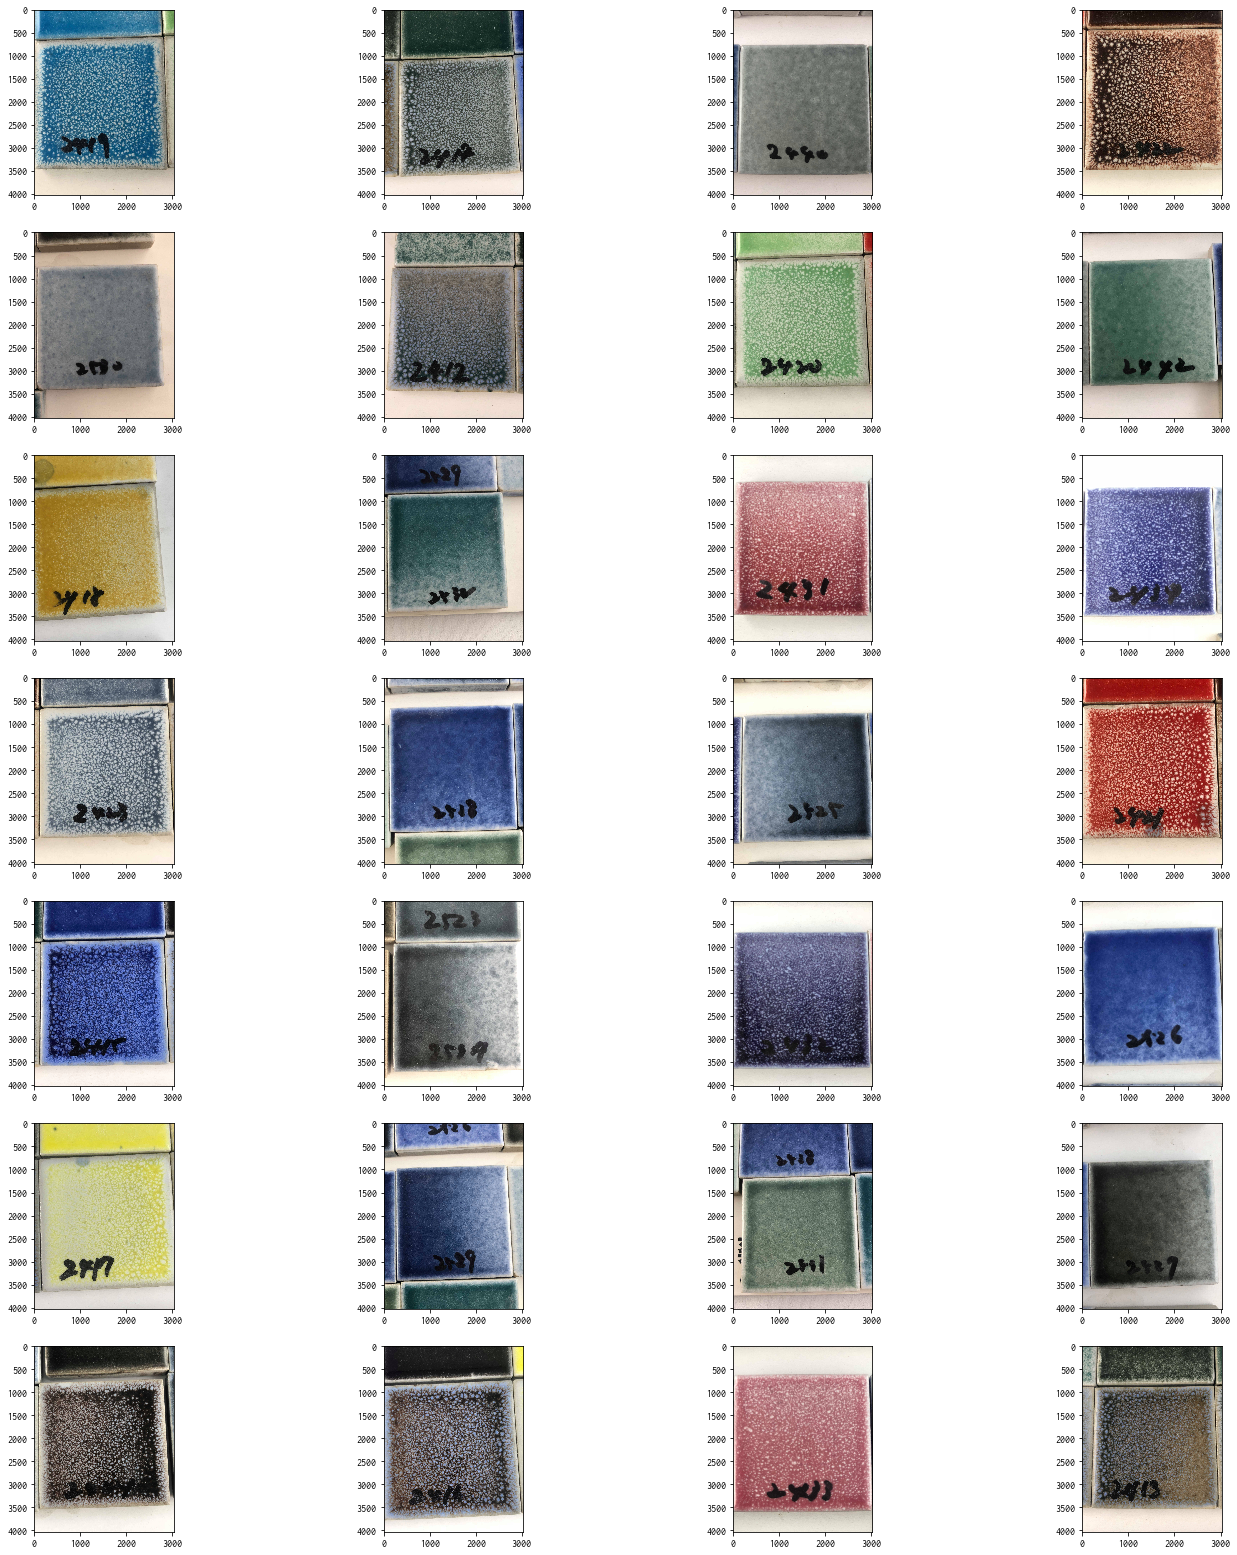

In [13]:
nrows = len(infilenames)//4
ncols = 4
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6*ncols, 4*nrows))

for i, infilename in enumerate(infilenames):
    in_img = Image.open(infilename)
    im_list = np.asarray(in_img)
    ax[i//4, i%4].imshow(im_list)
fig.savefig('images', dpi=200)
fig.show()